In [15]:
import math
import numpy as np
import random
import scipy
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
from IPython.display import HTML
import matplotlib.animation as animation
import seaborn as sns

In [16]:
sns.set_style(style="ticks")
sns.set_context('notebook')

In [17]:
#---start of def---
def initial_cond(x,A,x0,delta,init_type):
    if(init_type==1):
        a = np.cosh((1/delta) *(1/np.sqrt(12)) * np.sqrt(A) * (x - x0))
        return A/(np.multiply(a,a))
    else:
        b=np.sin(2*np.pi*x)
        return b
#---end of def---
#---start of def---
def U1(u0, h, k, delta):
    up1 = np.hstack([u0[1:], u0[:1]])
    up2 = np.hstack([u0[2:], u0[:2]])
    u = np.array(u0)
    um1 = np.hstack([u0[-1:], u0[:-1]])
    um2 = np.hstack([u0[-2:], u0[:-2]])

    a = (up1 - um1) / (2 * h)
    b = (up2 - 2 * up1 + 2 * um1 - um2) / (2 * h * h * h)
    d = (up1 + u + um1) / 3
    
    sol=u0-k*np.multiply(a,d)-delta*delta*k*b
    return sol
#---end of def---
#---start of def---
def U2(u0, u1, h, k, delta):    
    up1 = np.hstack([u1[1:], u1[:1]])
    up2 = np.hstack([u1[2:], u1[:2]])
    up3 = np.hstack([u1[3:], u1[:3]])
    up4 = np.hstack([u1[4:], u1[:4]])
    u = np.array(u1)
    um1 = np.hstack([u1[-1:], u1[:-1]])
    um2 = np.hstack([u1[-2:], u1[:-2]])
    um3 = np.hstack([u1[-3:], u1[:-3]])
    um4 = np.hstack([u1[-4:], u1[:-4]])
    
    a = (up1 - um1) / (2 * h)
    b = (up2 - 2 * up1 + 2 * um1 - um2) / (2 * h * h * h)
    d = (up1 + u + um1) / 3
    
    return u0 - 2 * k * np.multiply(d, a) - 2 * delta*delta * k * b
#---end of def---
#---start of def---
def solver(u0,u1,h,k,delta,steps):
    for i in range(steps-1):
        U = U2(u0,u1,h,k,delta)
        u0=u1
        u1=U
    return u1
#---end of def---
#---start of def---
def calc_k(h,delta,A):
    k=h*h*h/(4*delta*delta+h*h*A)
    return k
#---end of def---
#---start of def---
def analytical_solution(x,t,A,delta,x0):
    #a*(sech(sqrt(a/(delta*delta*12))*(x-c*t-x0)) .* sech(sqrt(a/(delta*delta*12))*(x-c*t-x0)) )
    c=A/3
    a = np.cosh((1/delta) *(1/np.sqrt(12)) * np.sqrt(A) * (x - x0 - c*t))
    return A/(np.multiply(a,a))
#---end of def---
#---start of def---
def visualise(u0,u1,h,k,delta,steps, ylim: tuple = (-1,1.5), xlim = (-8,8), anim_interval = 100):
    
    fig, ax = plt.subplots();
    line, = ax.plot([], [])
    frames_req=steps+1
    def init():
        line.set_data([], [])
    def animate(i):
        global u0
        global u1
        global U
        if(i==0):
            line.set_data(x, u0)
        if(i==1):
            line.set_data(x, u1)
        else:
            for j in range(1):
                U = U2(u0,u1,h,k,delta)
                u0 = u1
                u1 = U
        fig.suptitle("Time t="+str(i*k))
        line.set_data(x, U)

    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames_req, interval = anim_interval, repeat=False) 

    plt.close()

    return HTML(anim.to_jshtml())
#---end of def---

### Question 2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


h=0.002; k=1.1086474501108648e-06


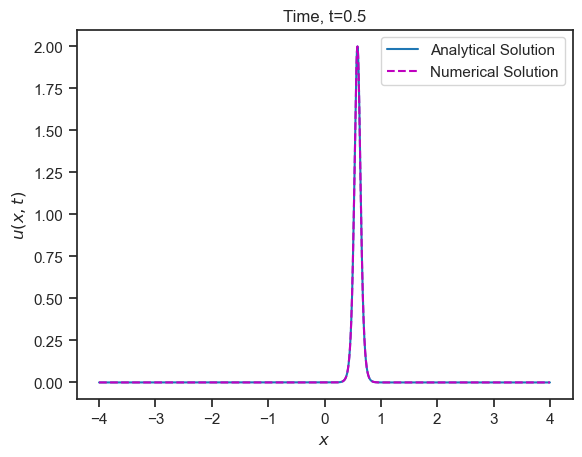

error: [5.55330425e-06 4.80596859e-06 3.98776453e-06 ... 7.28262507e-06
 6.79895289e-06 6.22031970e-06]
max error: 0.001188310768964973
mean error: 3.472347554442094e-05


In [144]:
A=2
x0=0.25
h=0.002
t=0.5
delta=0.03
x=np.arange(-4,4,h)
N=int(np.ceil(16/h))
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':1}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)
u_final_anal=analytical_solution(x,t,**analytical_solution_params_final)

print("h="+str(h)+"; k="+str(k))

plt.plot(x,u_final_anal,label='Analytical Solution')
plt.plot(x,u_final_num,'m--',label='Numerical Solution')
plt.title("Time, t="+str(k*2+k*(M-2)))
plt.legend()
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('fig1.eps')
plt.show()

error=abs(u_final_num-u_final_anal)
print('error:',error)
print('max error:', max(error))
print('mean error:', np.mean(error))

In [156]:
print(max(u_final_num))
print(min(u_final_num))

1.999886570588327
-3.210783823236606e-05


In [154]:
for i in range(int(0),int(0.8*len(x))):
    print(x[i], u_final_num[i])

-4.0 5.553304248963797e-06
-3.998 4.805968593435092e-06
-3.9960000000000004 3.987764527301483e-06
-3.9940000000000007 3.1094068312330126e-06
-3.992000000000001 2.1827149399924977e-06
-3.990000000000001 1.2204263813239383e-06
-3.9880000000000013 2.359865869438229e-07
-3.9860000000000015 -7.566803212637591e-07
-3.9840000000000018 -1.7434134227871745e-06
-3.982000000000002 -2.7100637589624646e-06
-3.980000000000002 -3.6427434578140036e-06
-3.9780000000000024 -4.528068891531315e-06
-3.9760000000000026 -5.353391892110269e-06
-3.974000000000003 -6.1070136696472175e-06
-3.972000000000003 -6.778376621871017e-06
-3.9700000000000033 -7.358230021151256e-06
-3.9680000000000035 -7.838766869902002e-06
-3.9660000000000037 -8.213729737632327e-06
-3.964000000000004 -8.47848460528626e-06
-3.962000000000004 -8.630062914048339e-06
-3.9600000000000044 -8.66717211313002e-06
-3.9580000000000046 -8.590176902761412e-06
-3.956000000000005 -8.401052726593622e-06
-3.954000000000005 -8.103314520513636e-06
-3.95200

In [155]:
for i in range(int(0.8*len(x))+1,int(len(x))):
    print(x[i], u_final_num[i])

2.401999999999295 -3.556267970463205e-06
2.4039999999992947 -3.248662021522004e-06
2.4059999999992945 -2.8869001483046455e-06
2.4079999999992943 -2.47805080961237e-06
2.409999999999294 -2.0298283730905812e-06
2.411999999999294 -1.550432806256592e-06
2.4139999999992936 -1.0483912223649447e-06
2.4159999999992934 -5.324046963145845e-07
2.417999999999293 -1.1202718872971065e-08
2.419999999999293 5.065927284781762e-07
2.4219999999992927 1.0125924191971336e-06
2.4239999999992925 1.4987536576400358e-06
2.4259999999992923 1.9574826462205655e-06
2.427999999999292 2.3817255957768522e-06
2.429999999999292 2.765049246123734e-06
2.4319999999992916 3.101711019384313e-06
2.4339999999992914 3.3867200765502124e-06
2.435999999999291 3.6158890676477246e-06
2.437999999999291 3.7858776349434893e-06
2.4399999999992907 3.894227160472644e-06
2.4419999999992905 3.939387326972828e-06
2.4439999999992903 3.9207335005112e-06
2.44599999999929 3.838575312226831e-06
2.44799999999929 3.694154990101002e-06
2.4499999999

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


1.9989902024279496
1.9989715461272977
1.9989902024279496 0.584999999999881
h=0.005; k=1.712328767123288e-05


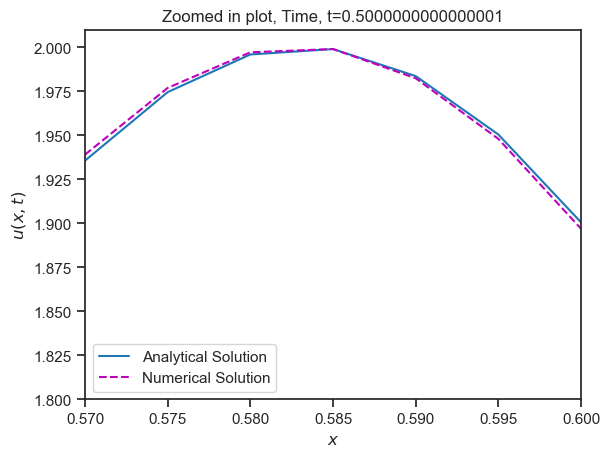

In [405]:
A=2
x0=0.25
h=0.005
t=0.5
delta=0.03
x=np.arange(-5,5,h)
N=int(np.ceil(16/h))
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':1}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)
u_final_anal=analytical_solution(x,t,**analytical_solution_params_final)
print(max(u_final_num))

print(max(u_final_anal))
print(u_final_num[list(u_final_num).index(max(u_final_num))],x[list(u_final_num).index(max(u_final_num))])
print("h="+str(h)+"; k="+str(k))

plt.plot(x,u_final_anal,label='Analytical Solution')
plt.plot(x,u_final_num,'m--',label='Numerical Solution')
plt.axis([0.57, 0.6, 1.8, 2.01])
plt.title("Zoomed in plot, Time, t="+str(k*2+k*(M-2)))
plt.legend()
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('fig2.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


1.9989902024279496
1.9989715461272977
1.9989902024279496 0.584999999999881
h=0.005; k=1.712328767123288e-05


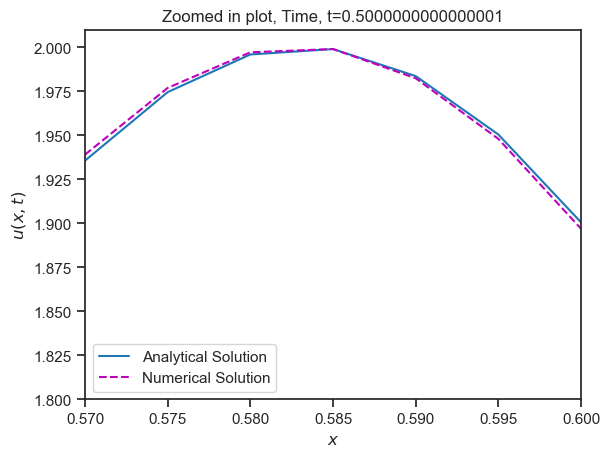

In [162]:
A=2
x0=0.25
h=0.005
t=0.5
delta=0.03
x=np.arange(-5,5,h)
N=int(np.ceil(16/h))
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':1}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)
u_final_anal=analytical_solution(x,t,**analytical_solution_params_final)
print(max(u_final_num))

print(max(u_final_anal))
print(u_final_num[list(u_final_num).index(max(u_final_num))],x[list(u_final_num).index(max(u_final_num))])
print("h="+str(h)+"; k="+str(k))

plt.plot(x,u_final_anal,label='Analytical Solution')
plt.plot(x,u_final_num,'m--',label='Numerical Solution')
plt.axis([0.57, 0.6, 1.8, 2.01])
plt.title("Zoomed in plot, Time, t="+str(k*2+k*(M-2)))
plt.legend()
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('fig2.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


h=0.007; k=4.6376419686316933e-05


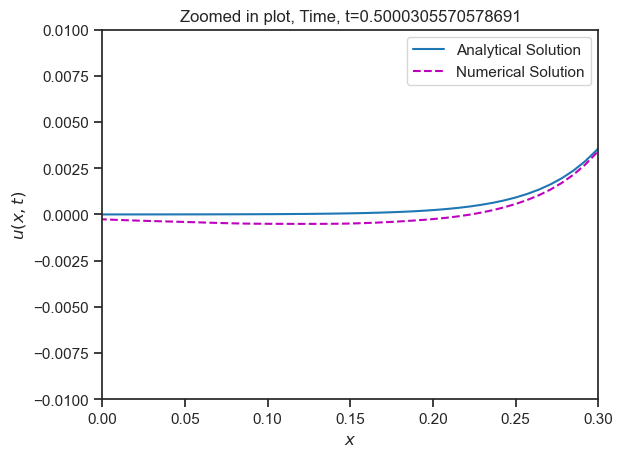

In [143]:
A=2
x0=0.25
h=0.007
t=0.5
delta=0.03
x=np.arange(-5,5,h)
N=int(np.ceil(16/h))
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':1}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)
u_final_anal=analytical_solution(x,t,**analytical_solution_params_final)

print("h="+str(h)+"; k="+str(k))

plt.plot(x,u_final_anal,label='Analytical Solution')
plt.plot(x,u_final_num,'m--',label='Numerical Solution')
plt.axis([0, 0.3, -0.01, 0.01])
plt.title("Zoomed in plot, Time, t="+str(k*2+k*(M-2)))
plt.legend()
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('fig5.eps')
plt.show()

In [45]:
A=2
x0=0.25
h=0.005
x=np.arange(-8,8,h)
N=int(np.ceil(16/h))
delta=0.03
k=0.5*calc_k(h,delta,A)

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':1}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

max_error_list=[]
mean_error_list=[]
t_list=list(np.arange(0,2,0.1))
for t in t_list:
    M=int(np.ceil(t/k))
    num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
    u_prev = initial_cond(x, **initial_cond_param)
    u_curr = U1(u_prev, **solution_params_first_step)
    u_final_num=solver(u_prev,u_curr,**num_solution_params_final)
    u_final_anal=analytical_solution(x,t,**analytical_solution_params_final)
    error=abs(u_final_num-u_final_anal)
    max_error_list.append(max(error))
    mean_error_list.append(np.mean(error))

Text(0, 0.5, 'Mean error')

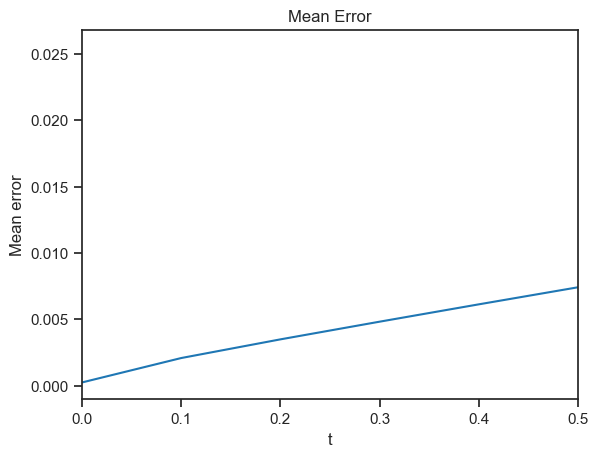

In [89]:
plt.plot(t_list,max_error_list)
plt.title("Mean Error")
plt.xlabel("t")
plt.xlim(0, 0.5)
plt.ylabel("Mean error")

Text(0, 0.5, 'Mean error')

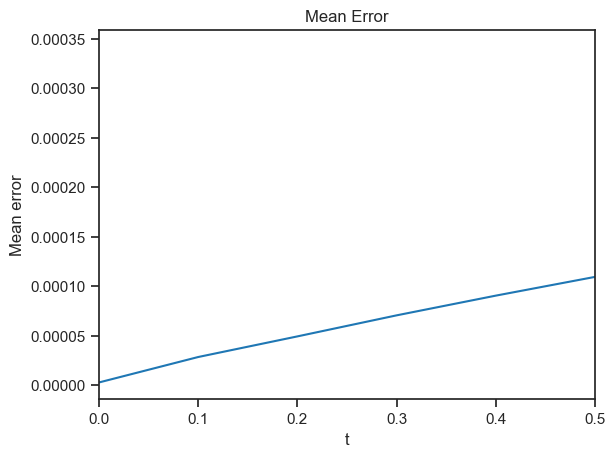

In [83]:
plt.plot(t_list,mean_error_list)
plt.title("Mean Error")
plt.xlabel("t")
plt.xlim(0, 0.5)
plt.ylabel("Mean error")

In [47]:
A=2
x0=0.25
h1=0.01
x=np.arange(-8,8,h1)
N=int(np.ceil(16/h1))
delta=0.03
k1=0.5*calc_k(h1,delta,A)

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':1}
solution_params_first_step = {'h':h1, 'k':k1, 'delta':delta}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

max_error_list_2=[]
mean_error_list_2=[]
t_list=list(np.arange(0,2,0.1))
for t in t_list:
    M=int(np.ceil(t/k1))
    num_solution_params_final = {'h':h1, 'k':k1, 'delta':delta,'steps':M}
    u_prev = initial_cond(x, **initial_cond_param)
    u_curr = U1(u_prev, **solution_params_first_step)
    u_final_num=solver(u_prev,u_curr,**num_solution_params_final)
    u_final_anal=analytical_solution(x,t,**analytical_solution_params_final)
    error=abs(u_final_num-u_final_anal)
    max_error_list_2.append(max(error))
    mean_error_list_2.append(np.mean(error))

In [48]:
A=2
x0=0.25
h2=0.007
x=np.arange(-8,8,h2)
N=int(np.ceil(16/h2))
delta=0.03
k2=0.5*calc_k(h2,delta,A)

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':1}
solution_params_first_step = {'h':h2, 'k':k2, 'delta':delta}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

max_error_list_3=[]
mean_error_list_3=[]
t_list=list(np.arange(0,2,0.1))
for t in t_list:
    M=int(np.ceil(t/k2))
    num_solution_params_final = {'h':h2, 'k':k2, 'delta':delta,'steps':M}
    u_prev = initial_cond(x, **initial_cond_param)
    u_curr = U1(u_prev, **solution_params_first_step)
    u_final_num=solver(u_prev,u_curr,**num_solution_params_final)
    u_final_anal=analytical_solution(x,t,**analytical_solution_params_final)
    error=abs(u_final_num-u_final_anal)
    max_error_list_3.append(max(error))
    mean_error_list_3.append(np.mean(error))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


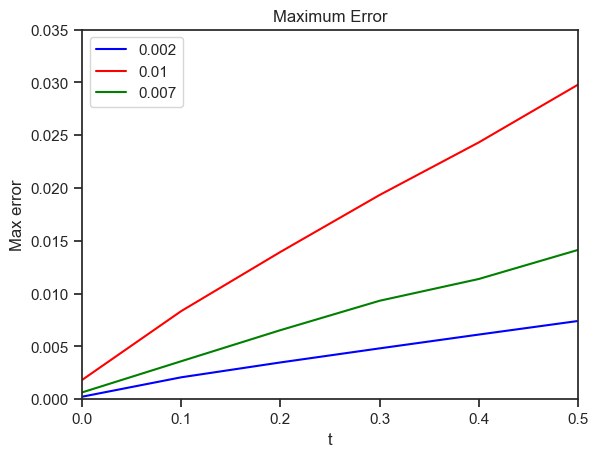

In [109]:
plt.plot(t_list,max_error_list,'b',label=str(h))
plt.plot(t_list,max_error_list_2,'r',label=str(h1))
plt.plot(t_list,max_error_list_3,'g',label=str(h2))
plt.title("Maximum Error")
plt.xlabel("t")
plt.xlim(0, 0.5)
plt.ylim(0, 0.035)
plt.ylabel("Max error")
plt.legend()
plt.savefig('fig4.eps')
plt.show()

In [112]:
print(np.interp(0.5,t_list,mean_error_list))
print(np.interp(0.5,t_list,max_error_list))

0.00010939680087503673
0.007411425778139247


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


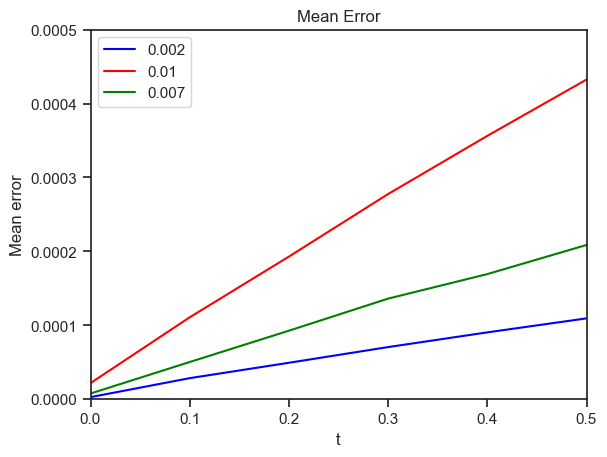

In [107]:
plt.plot(t_list,mean_error_list,'b',label=str(h))
plt.plot(t_list,mean_error_list_2,'r',label=str(h1))
plt.plot(t_list,mean_error_list_3,'g',label=str(h2))
plt.title("Mean Error")
plt.xlabel("t")
plt.xlim(0, 0.5)
plt.ylim(0, 0.0005)
plt.ylabel("Mean error")
plt.legend()
plt.savefig('fig3.eps')
plt.show()

Quite clear that: $$\text{Numerical solution's propagation speed} \geq \text{Exact solution's propagation speed}$$

### Question 3

h=0.005; k=1.712328767123288e-05


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


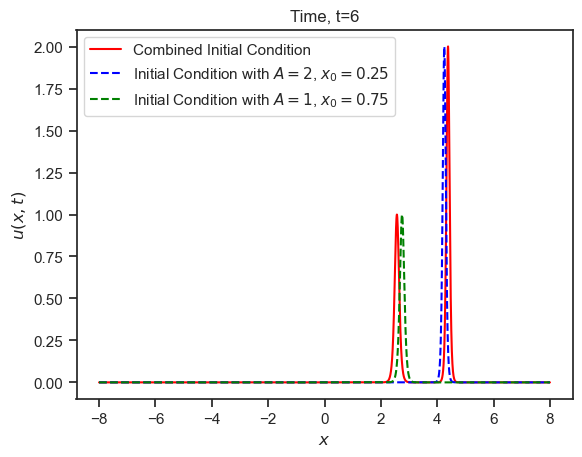

Mass, M = 0.5017851294669069
Energy, E = 0.26544920346284406


In [180]:
A1=2
x01=0.25
A2=1
x02=0.75
h=0.005
x=np.arange(-8,8,h)
N=int(np.ceil(16/h))
delta=0.03
k=min(0.5*calc_k(h,delta,A1), 0.5*calc_k(h,delta,A2))
initial_cond_param_1={'A':A1,'x0':x01,'delta':delta,'init_type':1}
initial_cond_param_2={'A':A2,'x0':x02,'delta':delta,'init_type':1}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}

print("h="+str(h)+"; k="+str(k))

t_list=[6]

for t in t_list:
    M=int(np.ceil(t/k))
    num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}

    u_prev = initial_cond(x, **initial_cond_param_1)+initial_cond(x, **initial_cond_param_2)
    u_curr = U1(u_prev, **solution_params_first_step)
    u_final_num=solver(u_prev,u_curr,**num_solution_params_final)
    
    u_prev_1 = initial_cond(x, **initial_cond_param_1)
    u_curr_1 = U1(u_prev_1, **solution_params_first_step)
    u_final_num_1=solver(u_prev_1,u_curr_1,**num_solution_params_final)
    
    u_prev_2 = initial_cond(x, **initial_cond_param_2)
    u_curr_2 = U1(u_prev_2, **solution_params_first_step)
    u_final_num_2=solver(u_prev_2,u_curr_2,**num_solution_params_final)

    plt.plot(x,u_final_num,'r',label='Combined Initial Condition')
    plt.plot(x,u_final_num_1,'b--',label='Initial Condition with $A=2$, $x_0=0.25$')
    plt.plot(x,u_final_num_2,'g--',label='Initial Condition with $A=1$, $x_0=0.75$')
    plt.title("Time, t="+str(t))
    plt.ylabel('$u(x,t)$')
    plt.xlabel('$x$')
    plt.legend()
    plt.savefig('figq4big.eps')
    plt.show()

    Mass=np.trapz(u_final_num, x)
    E=np.trapz(0.5*np.multiply(u_final_num,u_final_num),x)

    print("Mass, M = "+str(Mass))
    print("Energy, E = "+str(E))

h=0.005; k=1.712328767123288e-05


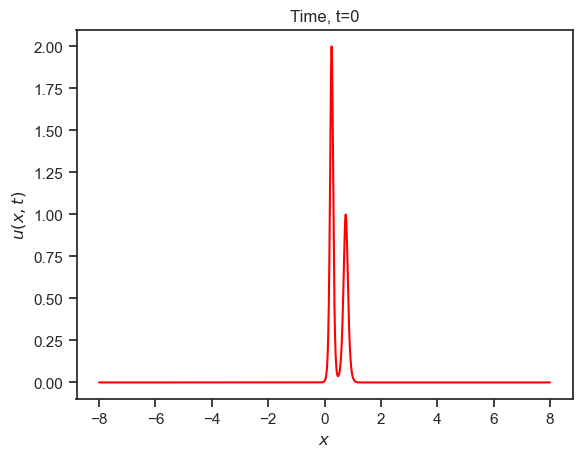

Mass, M = 0.5017848660422465
Energy, E = 0.26544920710345604


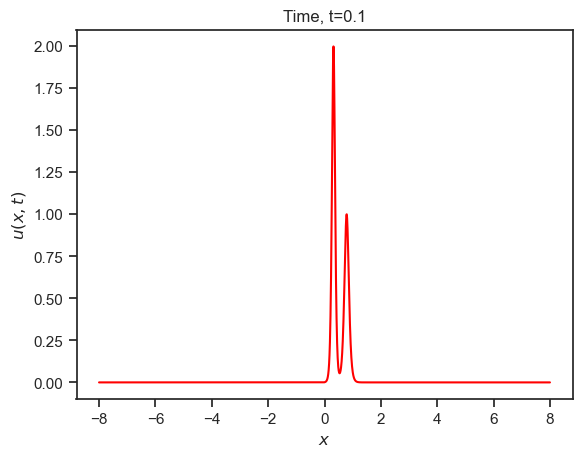

Mass, M = 0.5017848660422467
Energy, E = 0.26544920671157096


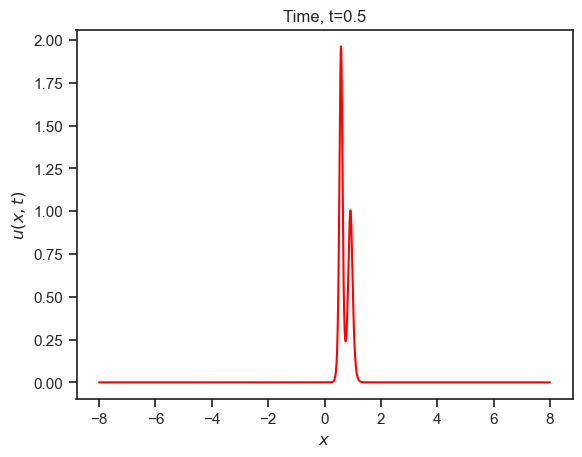

Mass, M = 0.5017848867163822
Energy, E = 0.265449206495078


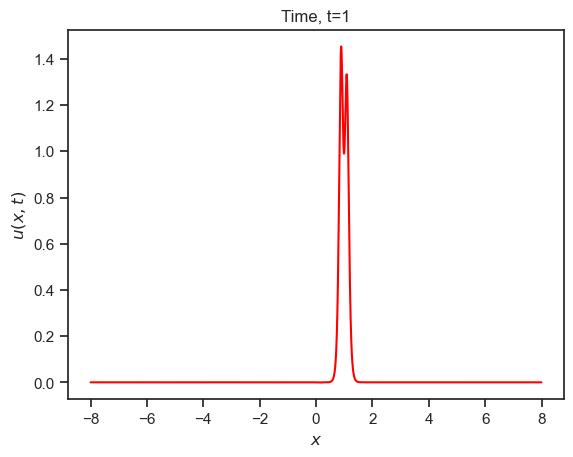

Mass, M = 0.5017850158660467
Energy, E = 0.26544920335787764


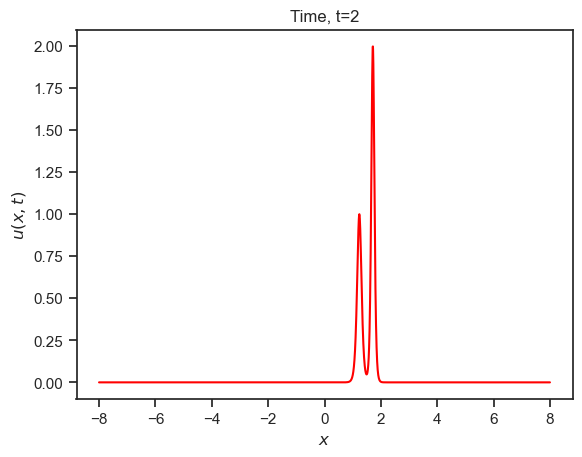

Mass, M = 0.5017845378253456
Energy, E = 0.2654492064808077


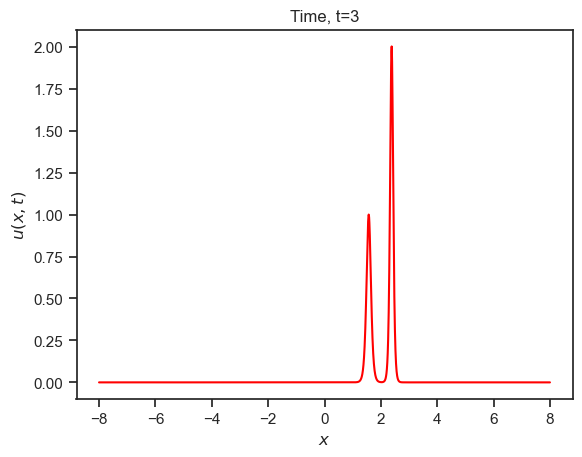

Mass, M = 0.5017851335923953
Energy, E = 0.2654492065444142


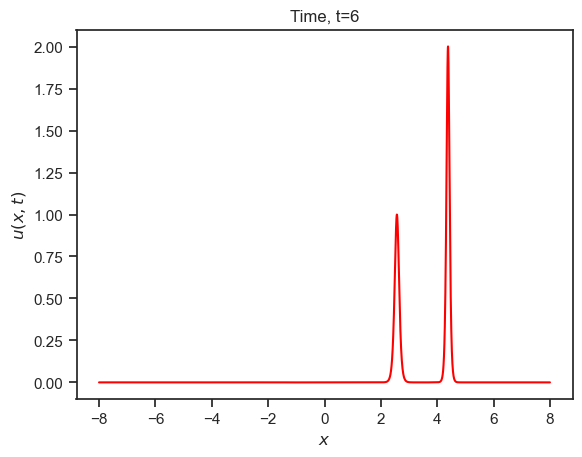

Mass, M = 0.5017851294669069
Energy, E = 0.26544920346284406


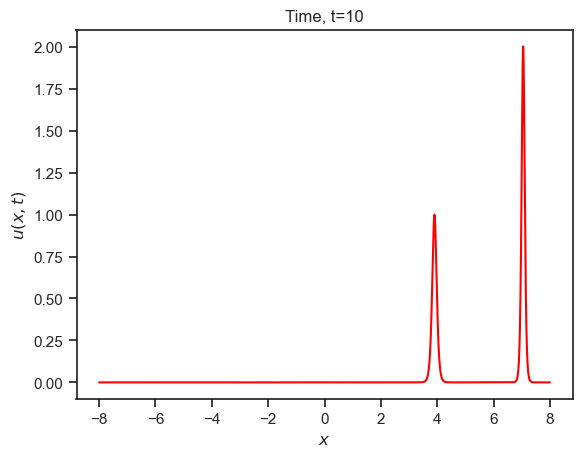

Mass, M = 0.5017849308025877
Energy, E = 0.2654492055639171


In [170]:
A1=2
x01=0.25
A2=1
x02=0.75
h=0.005
x=np.arange(-8,8,h)
N=int(np.ceil(16/h))
delta=0.03
k=min(0.5*calc_k(h,delta,A1), 0.5*calc_k(h,delta,A2))
initial_cond_param_1={'A':A1,'x0':x01,'delta':delta,'init_type':1}
initial_cond_param_2={'A':A2,'x0':x02,'delta':delta,'init_type':1}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}

print("h="+str(h)+"; k="+str(k))

t_list=[0, 0.1, 0.5, 1, 2, 3, 6, 10]

for t in t_list:
    M=int(np.ceil(t/k))
    num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}

    u_prev = initial_cond(x, **initial_cond_param_1)+initial_cond(x, **initial_cond_param_2)
    u_curr = U1(u_prev, **solution_params_first_step)
    u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

    plt.plot(x,u_final_num,'r',label='Numerical Solution')
    plt.title("Time, t="+str(t))
    plt.ylabel('$u(x,t)$')
    plt.xlabel('$x$')
    plt.savefig('figq4t'+str(t)+'.eps')
    plt.show()

    Mass=np.trapz(u_final_num, x)
    E=np.trapz(0.5*np.multiply(u_final_num,u_final_num),x)

    print("Mass, M = "+str(Mass))
    print("Energy, E = "+str(E))

In [181]:
A1=2
x01=0.25
A2=1
x02=0.75
h=0.005
x=np.arange(-8,8,h)
N=int(np.ceil(16/h))
delta=0.03
k=min(0.5*calc_k(h,delta,A1), 0.5*calc_k(h,delta,A2))
initial_cond_param_1={'A':A1,'x0':x01,'delta':delta,'init_type':1}
initial_cond_param_2={'A':A2,'x0':x02,'delta':delta,'init_type':1}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}

print("h="+str(h)+"; k="+str(k))

t_list=list(np.arange(0,10,0.5))

M_list_1=[]
E_list_1=[]
for t in t_list:
    M=int(np.ceil(t/k))
    num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}


    u_prev = initial_cond(x, **initial_cond_param_1)
    u_curr = U1(u_prev, **solution_params_first_step)
    u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

    Mass=np.trapz(u_final_num, x)
    E=np.trapz(0.5*np.multiply(u_final_num,u_final_num),x)
    E_list_1.append(E)
    M_list_1.append(Mass)

for i in range(len(t_list)):
    print(t_list[i], M_list_1[i], E_list_1[i])

h=0.005; k=1.712328767123288e-05
0.0 0.29393876913398126 0.1959591832007792
0.5 0.29393879038045595 0.19595918300106935
1.0 0.2939389194067969 0.1959591799877522
1.5 0.29393890367873726 0.19595918238991658
2.0 0.29393843130313796 0.19595918045381053
2.5 0.29393889736445233 0.19595918164239368
3.0 0.29393885292209165 0.19595918166038886
3.5 0.2939391365221499 0.19595918046253125
4.0 0.29393855012167164 0.19595918236773138
4.5 0.29393931294717657 0.19595917995508766
5.0 0.29393910716721305 0.19595918300174572
5.5 0.2939391521254541 0.19595917942202024
6.0 0.29393868940359125 0.19595918296528164
6.5 0.2939386228308441 0.195959180000591
7.0 0.2939388927887931 0.19595918240420548
7.5 0.29393887312088307 0.19595918046198182
8.0 0.2939389858499156 0.19595918161108633
8.5 0.2939385683241984 0.1959591816789516
9.0 0.29393865107072886 0.19595918048563296
9.5 0.2939391265926216 0.19595918234431992


In [182]:
A1=2
x01=0.25
A2=1
x02=0.75
h=0.005
x=np.arange(-8,8,h)
N=int(np.ceil(16/h))
delta=0.03
k=min(0.5*calc_k(h,delta,A1), 0.5*calc_k(h,delta,A2))
initial_cond_param_1={'A':A1,'x0':x01,'delta':delta,'init_type':1}
initial_cond_param_2={'A':A2,'x0':x02,'delta':delta,'init_type':1}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}

print("h="+str(h)+"; k="+str(k))

t_list=list(np.arange(0,10,0.5))

M_list_2=[]
E_list_2=[]
for t in t_list:
    M=int(np.ceil(t/k))
    num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}


    u_prev = initial_cond(x, **initial_cond_param_2)
    u_curr = U1(u_prev, **solution_params_first_step)
    u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

    Mass=np.trapz(u_final_num, x)
    E=np.trapz(0.5*np.multiply(u_final_num,u_final_num),x)
    E_list_2.append(E)
    M_list_2.append(Mass)

for i in range(len(t_list)):
    print(t_list[i], M_list_2[i], E_list_2[i])

h=0.005; k=1.712328767123288e-05
0.0 0.20784609690826522 0.06928203246983748
0.5 0.20784609656402825 0.06928203232421308
1.0 0.20784608811157013 0.06928203236927015
1.5 0.20784606730681077 0.06928203240987432
2.0 0.20784605436205864 0.06928203244253622
2.5 0.20784604838560064 0.06928203246406878
3.0 0.2078460636659089 0.06928203245354912
3.5 0.2078460239729677 0.06928203240647483
4.0 0.20784602080413664 0.06928203235530002
4.5 0.20784616906869569 0.06928203232588716
5.0 0.20784609183235 0.06928203231543338
5.5 0.20784607959945703 0.06928203232188516
6.0 0.20784605532887254 0.06928203235821441
6.5 0.20784612520102255 0.06928203241477737
7.0 0.2078461715704448 0.06928203245377725
7.5 0.20784596110414763 0.06928203245707452
8.0 0.20784609620334227 0.0692820324424371
8.5 0.2078461236534343 0.06928203241243909
9.0 0.20784605102594902 0.06928203236477001
9.5 0.2078460933832767 0.0692820323182813


In [185]:
for i in range(len(t_list)): 
    print('$'+str(t_list[i])+'$ & $'+str(M_list_1[i]+M_list_2[i]-M_list[i]) +'$ & $'+str( E_list_1[i]+E_list_2[i]-E_list[i])+'$ \\ \hline')

$0.0$ & $0.0$ & $-0.0002079914328393384$ \ \hline
$0.5$ & $2.2810198174738616e-10$ & $-0.00020799116979558496$ \ \hline
$1.0$ & $-8.347679769649119e-09$ & $-0.00020799100085527877$ \ \hline
$1.5$ & $-2.271971610845469e-08$ & $-0.00020798832656382382$ \ \hline
$2.0$ & $-5.216014897779786e-08$ & $-0.00020799358446099703$ \ \hline
$2.5$ & $-6.366299698523648e-08$ & $-0.0002079894304888863$ \ \hline
$3.0$ & $-2.1700439467586818e-07$ & $-0.00020799243047620042$ \ \hline
$3.5$ & $-1.667673594774044e-07$ & $-0.00020799166895829613$ \ \hline
$4.0$ & $-1.0667567829081293e-08$ & $-0.00020799104102026122$ \ \hline
$4.5$ & $6.610472885748564e-07$ & $-0.00020799312393326996$ \ \hline
$5.0$ & $4.5956245153799813e-07$ & $-0.00020798937259025596$ \ \hline
$5.5$ & $2.8722906697531414e-07$ & $-0.0002079942662153167$ \ \hline
$6.0$ & $-3.847344430818467e-07$ & $-0.0002079881393480254$ \ \hline
$6.5$ & $-3.3465838600310605e-07$ & $-0.00020799403903826175$ \ \hline
$7.0$ & $6.076789941245053e-07$ & $-0.000

In [169]:
A1=2
x01=0.25
A2=1
x02=0.75
h=0.005
x=np.arange(-8,8,h)
N=int(np.ceil(16/h))
delta=0.03
k=min(0.5*calc_k(h,delta,A1), 0.5*calc_k(h,delta,A2))
initial_cond_param_1={'A':A1,'x0':x01,'delta':delta,'init_type':1}
initial_cond_param_2={'A':A2,'x0':x02,'delta':delta,'init_type':1}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}

print("h="+str(h)+"; k="+str(k))

t_list=list(np.arange(0,10,0.5))

M_list=[]
E_list=[]
for t in t_list:
    M=int(np.ceil(t/k))
    num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}


    u_prev = initial_cond(x, **initial_cond_param_1)+initial_cond(x, **initial_cond_param_2)
    u_curr = U1(u_prev, **solution_params_first_step)
    u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

    Mass=np.trapz(u_final_num, x)
    E=np.trapz(0.5*np.multiply(u_final_num,u_final_num),x)
    E_list.append(E)
    M_list.append(Mass)

for i in range(len(t_list)):
    print(t_list[i], M_list[i], E_list[i])

h=0.005; k=1.712328767123288e-05
0.0 0.5017848660422465 0.26544920710345604
0.5 0.5017848867163822 0.265449206495078
1.0 0.5017850158660467 0.26544920335787764
1.5 0.5017849937052641 0.2654492031263547
2.0 0.5017845378253456 0.2654492064808077
2.5 0.5017850094130499 0.26544920353695134
3.0 0.5017851335923953 0.2654492065444142
3.5 0.501785327262477 0.2654492045379644
4.0 0.5017845815933761 0.2654492057640517
4.5 0.5017848209685837 0.2654492054049081
5.0 0.5017847394371115 0.26544920468976935
5.5 0.5017849444958441 0.26544920601012073
6.0 0.5017851294669069 0.26544920346284406
6.5 0.5017850826902527 0.2654492064544066
7.0 0.5017844566802437 0.26544920334733285
7.5 0.5017852382773628 0.26544920659881155
8.0 0.5017846229854733 0.2654492038482079
8.5 0.5017849414761453 0.2654492064792994
9.0 0.5017847953653627 0.26544920488647356
9.5 0.5017848176948685 0.26544920533264216


### Question 4

h=0.005; k=0.0012500000000000002


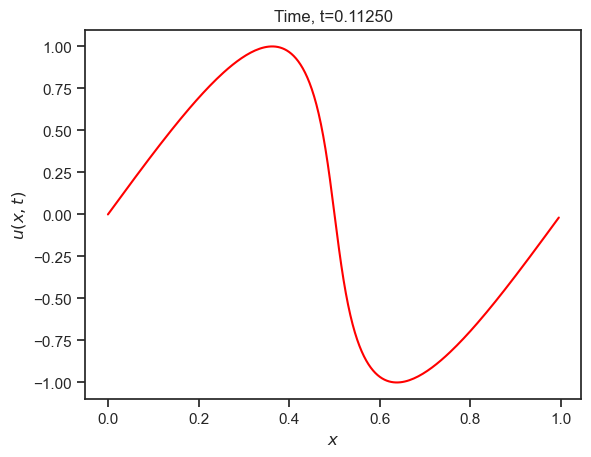

In [198]:
A=2
x0=0.25
h=0.005
t=0.7*1/(2*np.pi)
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))

plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5i.eps')
plt.show()


h=0.005; k=0.0012500000000000002


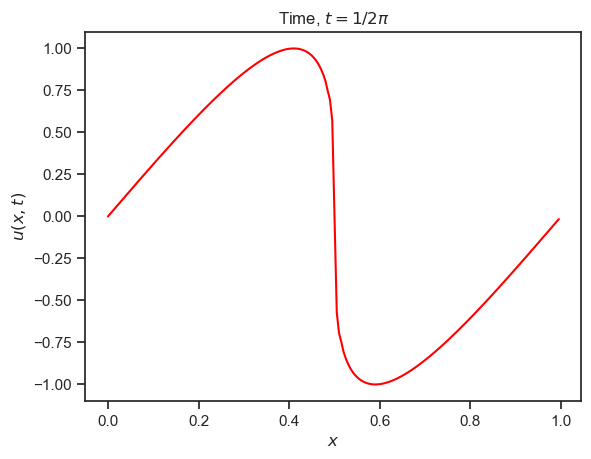

In [212]:
A=2
x0=0.25
h=0.005
t=1/(2*np.pi)
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))

plt.plot(x,u_final_num,'r')
plt.title("Time, $t=1/2\pi$")
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5ii.eps')
plt.show()


h=0.005; k=1.712328767123288e-05


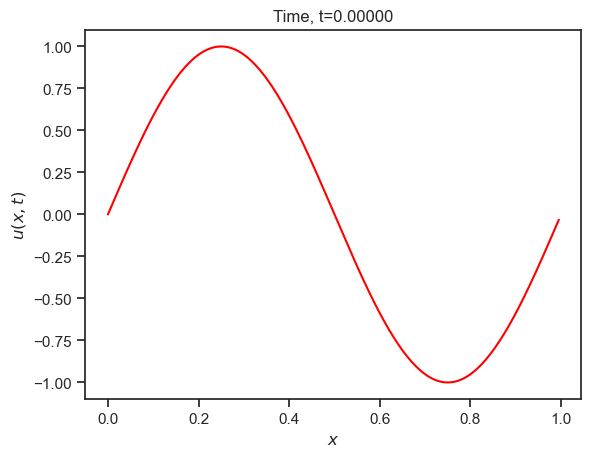

In [245]:
A=2
x0=0.25
h=0.005
t=0
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0.03
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))

plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5ai.eps')
plt.show()


h=0.005; k=1.712328767123288e-05


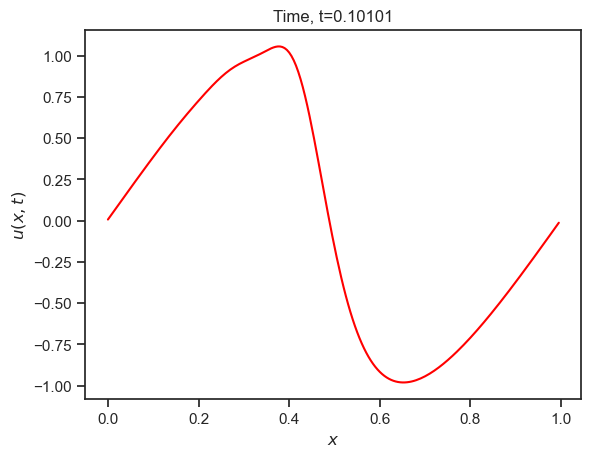

In [358]:
A=2
x0=0.25
h=0.005
t=0.101
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0.03
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))

plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5aii.eps')
plt.show()


h=0.005; k=1.712328767123288e-05


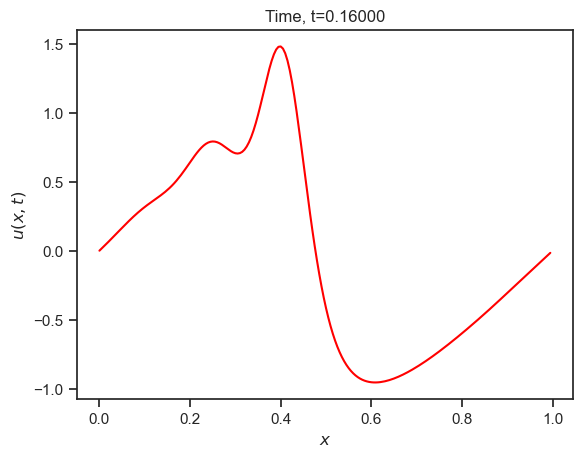

In [247]:
A=2
x0=0.25
h=0.005
t=0.16
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0.03
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))

plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5aiii.eps')
plt.show()


h=0.005; k=1.712328767123288e-05


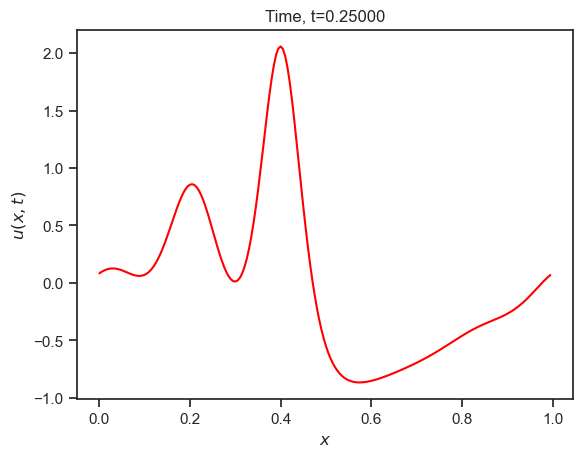

In [248]:
A=2
x0=0.25
h=0.005
t=0.25
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0.03
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))

plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5aiv.eps')
plt.show()


h=0.005; k=1.712328767123288e-05
2.2045568073578306


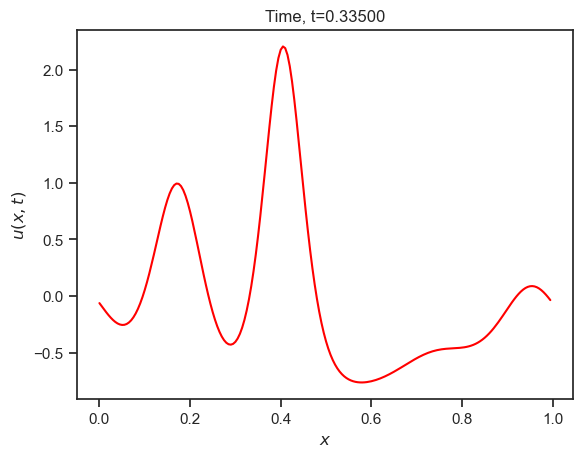

In [389]:
A=2
x0=0.25
h=0.005
t=0.335
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0.03
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))
print(max(u_final_num))
plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5av.eps')
plt.show()


h=0.005; k=1.712328767123288e-05


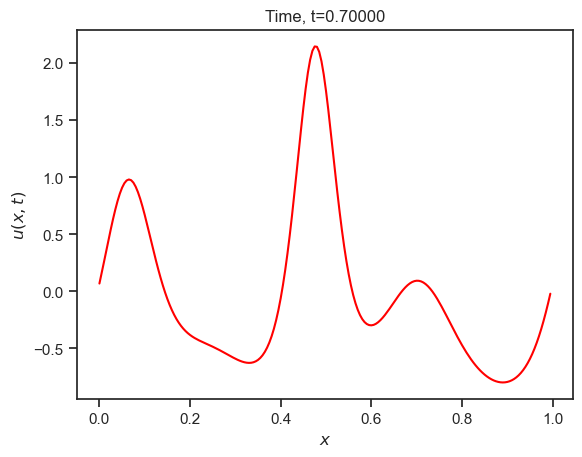

In [392]:
A=2
x0=0.25
h=0.005
t=0.70
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0.03
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))

plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5avi.eps')
plt.show()


h=0.005; k=0.0001388888888888889
1.002450940253869


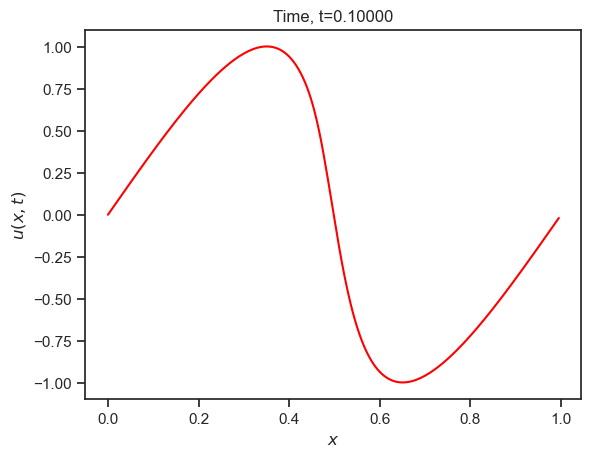

In [307]:
A=2
x0=0.25
h=0.005
t=0.1
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0.01
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))
print(max(u_final_num))
plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5bi.eps')
plt.show()


h=0.005; k=0.0001388888888888889
1.003545141989262


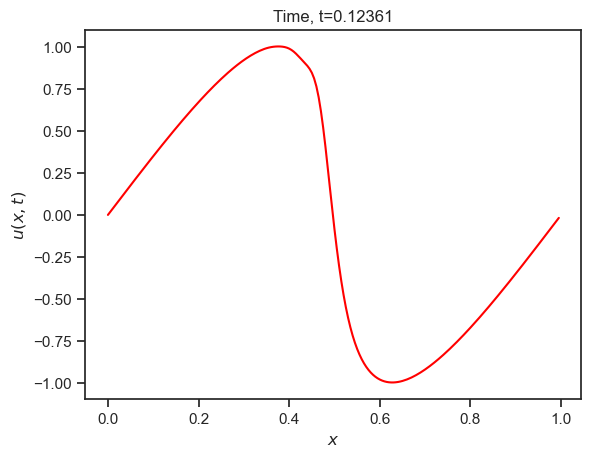

In [364]:
A=2
x0=0.25
h=0.005
t=0.1235
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0.01
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))
print(max(u_final_num))
plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5bii.eps')
plt.show()


h=0.005; k=0.0001388888888888889
2.0248045835761577


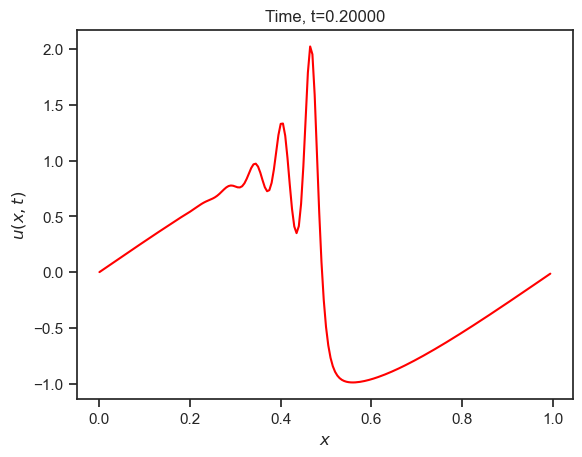

In [309]:
A=2
x0=0.25
h=0.005
t=0.2
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0.01
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))
print(max(u_final_num))
plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5biii.eps')
plt.show()


h=0.005; k=0.0001388888888888889
2.7236700851806166


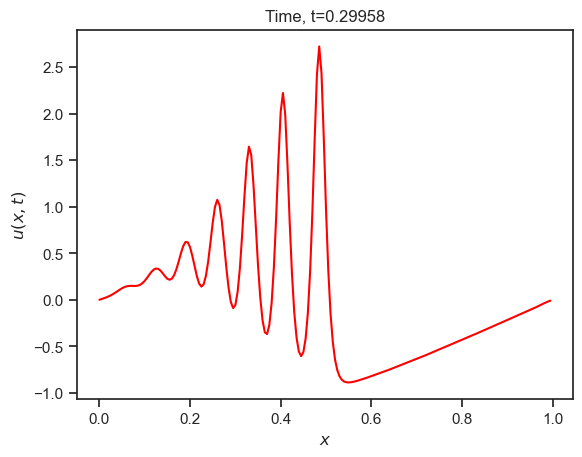

In [310]:
A=2
x0=0.25
h=0.005
t=0.2995
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0.01
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))
print(max(u_final_num))
plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5biv.eps')
plt.show()


h=0.005; k=0.0001388888888888889
2.4529890564802064


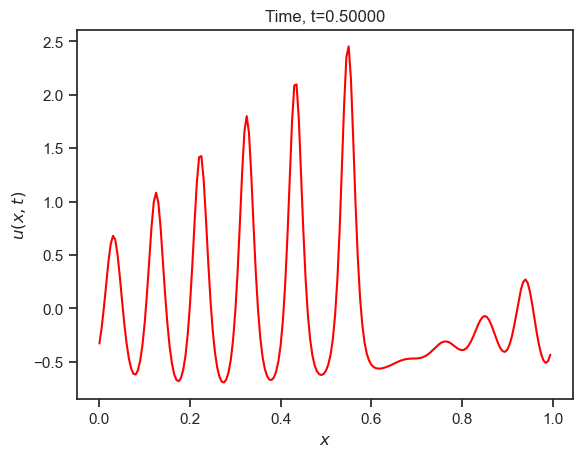

In [376]:
A=2
x0=0.25
h=0.005
t=0.5
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0.01
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))
print(max(u_final_num))
plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5bv.eps')
plt.show()


h=0.005; k=0.0001388888888888889
2.4727837570808004


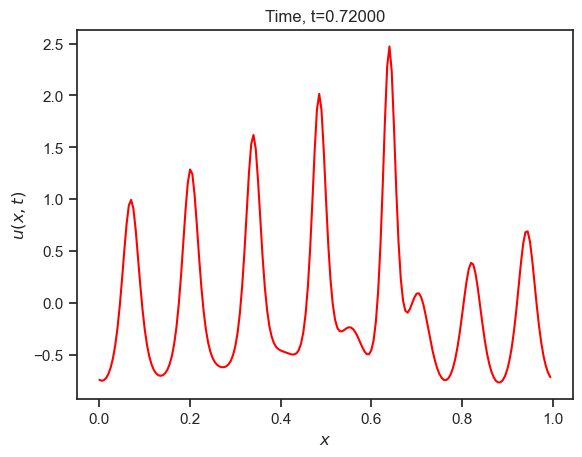

In [383]:
A=2
x0=0.25
h=0.005
t=0.72
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0.01
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))
print(max(u_final_num))
plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5bvi.eps')
plt.show()


h=0.005; k=6.218905472636816e-06
1.0172135134793179


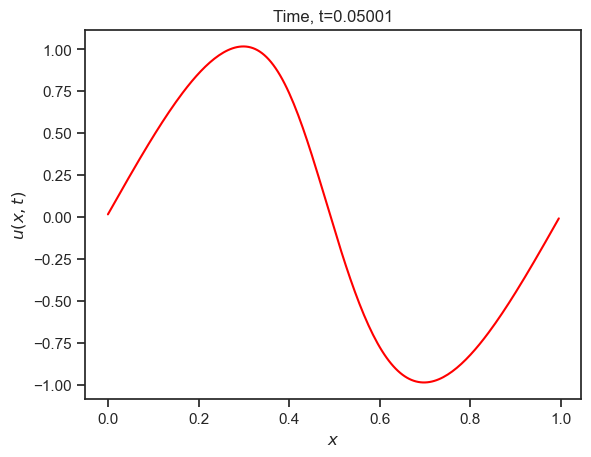

In [322]:
A=2
x0=0.25
h=0.005
t=0.05
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0.05
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))
print(max(u_final_num))
plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5ci.eps')
plt.show()


h=0.005; k=6.218905472636816e-06
1.1295955796755337


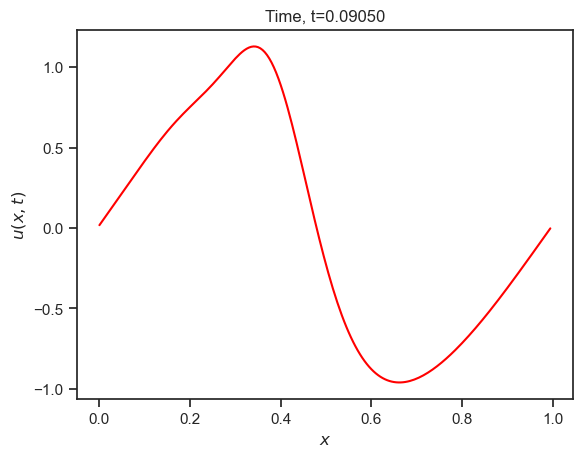

In [398]:
A=2
x0=0.25
h=0.005
t=0.0905
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0.05
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))
print(max(u_final_num))
plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5cii.eps')
plt.show()


h=0.005; k=6.218905472636816e-06
1.663579320665206


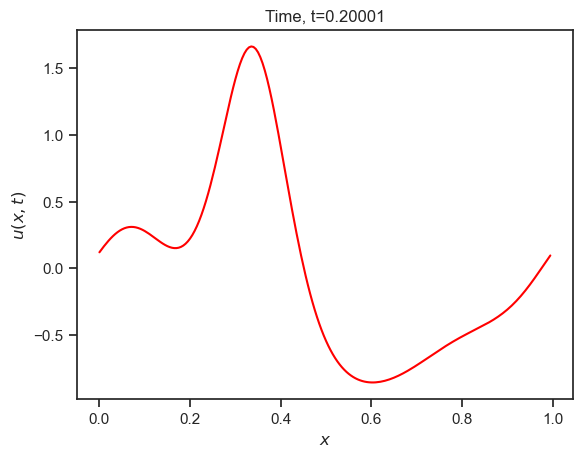

In [340]:
A=2
x0=0.25
h=0.005
t=0.2
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0.05
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))
print(max(u_final_num))
plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5ciii.eps')
plt.show()


h=0.005; k=6.218905472636816e-06
1.8589798244285598


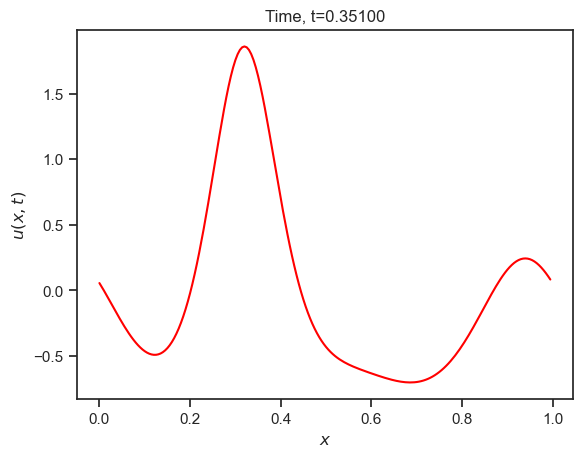

In [344]:
A=2
x0=0.25
h=0.005
t=0.351
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0.05
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))
print(max(u_final_num))
plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5civ.eps')
plt.show()


h=0.005; k=6.218905472636816e-06
1.7306731258360046


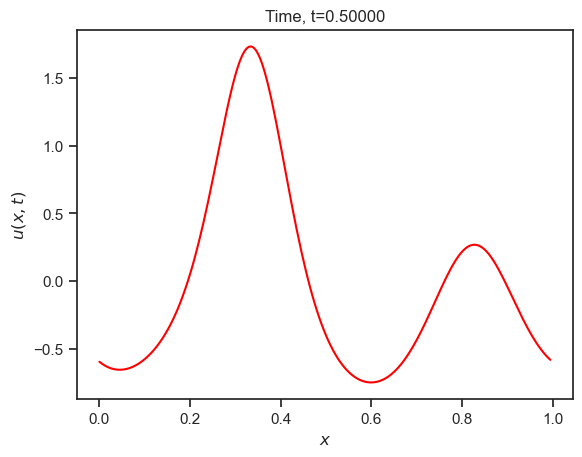

In [345]:
A=2
x0=0.25
h=0.005
t=0.5
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0.05
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))
print(max(u_final_num))
plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5cv.eps')
plt.show()


h=0.005; k=6.218905472636816e-06
1.760298335200213


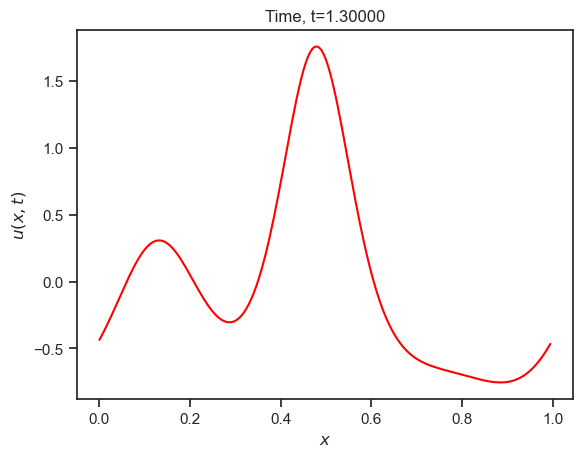

In [404]:
A=2
x0=0.25
h=0.005
t=1.3
x=np.arange(0,1,h)
N=int(np.ceil(16/h))
delta=0.05
k=0.5*calc_k(h,delta,A)
M=int(np.ceil(t/k))

initial_cond_param={'A':A,'x0':x0,'delta':delta,'init_type':2}
solution_params_first_step = {'h':h, 'k':k, 'delta':delta}
num_solution_params_final = {'h':h, 'k':k, 'delta':delta,'steps':M}
analytical_solution_params_final={'A':A,'delta':delta,'x0':x0}

u_prev = initial_cond(x, **initial_cond_param)
u_curr = U1(u_prev, **solution_params_first_step)
u_final_num=solver(u_prev,u_curr,**num_solution_params_final)

print("h="+str(h)+"; k="+str(k))
print(max(u_final_num))
plt.plot(x,u_final_num,'r')
plt.title("Time, t="+str('%.5f'%(k*2+k*(M-2))))
plt.ylabel('$u(x,t)$')
plt.xlabel('$x$')
plt.savefig('figq5cvi.eps')
plt.show()
